In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.options.display.max_columns = 50
chicago_df = pd.read_csv("chicagodata.csv")
gender_df = pd.read_csv("gender.csv")
#chicago_df.head()
gender_df.head()

,CONTENTS,STATE,GROUP,YEAR,SUB,POP,AGENCY,OFFENSE,OCCUR,MALE0_9,MALE10_12,MALE13_14,MALE15,MALE16,MALE17,MALE18,MALE19,MALE20,MALE21,MALE22,MALE23,MALE24,MALE25_29,MALE30_34,MALE35_39,...,ADULT_WHITE,ADULT_BLACK,ADULT_INDIAN,ADULT_ASIAN,JUVENILE_WHITE,JUVENILE_BLACK,JUVENILE_INDIAN,JUVENILE_ASIAN,ADULT_HISPANIC,ADULT_NONHISPANIC,JUVENILE_HISPANIC,JUVENILE_NONHISPANIC,TOTAL,MALE_TOTAL,FEMALE_TOTAL,ADULT_MALE,ADULT_FEMALE,JUVENILE_MALE,JUVENILE_FEMALE,ADULT_TOTAL,JUVENILE_TOTAL,10_14years,15-19years,20-24years,Gender
0,Detail record,Illinois,"Cities 1,000,000 or over",16,Non-Suburban,2725153,CHICAGO,Forcible rape,30.0,0,1,11,7,5,9,8,2,6,7,10,6,5,38,48,30,...,102.0,130,0,3,10,24,0,0,0,0,0,0,269.0,269.0,4.0,235.0,3.0,0.0,1.0,259.0,34.0,12,31,34,Male
1,Detail record,Illinois,"Cities 1,000,000 or over",16,Non-Suburban,2725153,CHICAGO,Robbery,44.0,0,13,93,148,182,165,129,91,78,69,40,47,49,136,56,30,...,183.0,722,2,5,86,565,0,1,0,0,0,0,1564.0,1564.0,148.0,912.0,97.0,0.0,51.0,1381.0,652.0,106,715,283,Male
2,Detail record,Illinois,"Cities 1,000,000 or over",16,Non-Suburban,2725153,CHICAGO,Aggravated assault,48.0,0,10,37,34,44,59,56,51,46,46,67,44,35,187,127,98,...,372.0,903,0,11,55,169,0,2,0,0,0,0,1512.0,1512.0,282.0,1286.0,240.0,0.0,42.0,1439.0,226.0,47,244,238,Male
3,Detail record,Illinois,"Cities 1,000,000 or over",16,Non-Suburban,2725153,CHICAGO,Burglary-breaking or entering,46.0,0,13,69,47,60,65,51,39,32,31,27,24,20,77,56,46,...,210.0,414,1,5,47,217,0,2,0,0,0,0,896.0,896.0,54.0,630.0,42.0,0.0,12.0,824.0,266.0,82,262,134,Male
4,Detail record,Illinois,"Cities 1,000,000 or over",16,Non-Suburban,2725153,CHICAGO,Larceny-theft (not motor vehicles),50.0,0,47,140,154,148,165,175,161,139,137,125,153,121,552,527,369,...,2047.0,4192,9,94,270,758,1,19,0,0,0,0,7390.0,7390.0,2316.0,6342.0,1922.0,0.0,394.0,7108.0,1048.0,187,803,675,Male


In [3]:
# Describe data stats.
chicago_df.describe()

,year,date,actual_murder,actual_manslaughter,actual_rape_total,actual_robbery_total,actual_assault_total,actual_burg_total,actual_theft_total,actual_mtr_veh_theft_total,actual_all_crimes,actual_assault_aggravated,actual_index_violent,actual_index_property,actual_index_total
count,336.000000,336.000000,336.000000,336.0,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2017.500000,43085.000000,4.270833,0.0,10.315476,71.869048,93.994048,82.577381,382.184524,69.535714,714.747024,93.994048,180.449405,534.297619,714.747024
std,0.500746,210.870038,15.792531,0.0,36.437497,259.039617,340.647294,294.453240,1350.902783,249.204786,2539.087615,340.647294,648.602293,1891.382702,2539.087615
min,2017.000000,42736.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,42909.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.500000,43085.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,9.000000,0.000000,0.000000,6.000000,9.000000
75%,2018.000000,43259.500000,0.000000,0.0,0.000000,1.000000,1.000000,3.000000,20.000000,1.000000,28.000000,1.000000,3.000000,25.250000,28.000000
max,2018.000000,43435.000000,95.000000,0.0,183.000000,1239.000000,1601.000000,1372.000000,6436.000000,1191.000000,11475.000000,1601.000000,3091.000000,8548.000000,11475.000000


In [5]:
# Generate counts, sum and avg.
df_crimes = (chicago_df[["year", "month", "actual_all_crimes"]].groupby(['year', 'month'])
               .agg({
                   'actual_all_crimes': ['count', 'mean','sum']
        
                           }))

In [6]:
# Generate total crimes by year
year_df = chicago_df[["year", "actual_all_crimes"]] 
df_year = year_df.groupby('year').sum().reset_index()
df_year

,year,actual_all_crimes
0,2017,119563
1,2018,120592


No handles with labels found to put in legend.


Text(0, 0.5, 'Number of Crimes')

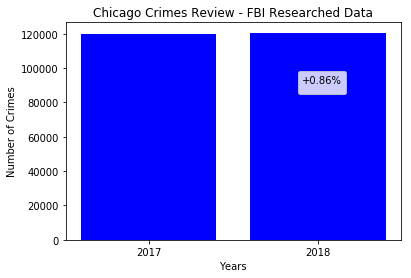

In [7]:
year_df = df_year['year']
crimes_df = df_year['actual_all_crimes']
x_axis = np.arange(len(year_df))
plt.bar(x_axis, crimes_df, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, year_df)
plt.legend(title='+0.86%', fontsize = 10, loc='best', bbox_to_anchor=(0.35, 0., 0.5, 0.8))
plt.title("Chicago Crimes Review - FBI Researched Data")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [14]:

# Find the difference over years and months
month_df = chicago_df[["year","month","date", "actual_all_crimes"]]

Df_2018 =  month_df[month_df['year']== 2018]
Df_2017 =  month_df[month_df['year']== 2017]

Df_2018_drop = Df_2018[["month", "date","actual_all_crimes"]]
Df_2017_drop = Df_2017[["month", "date","actual_all_crimes"]]

Df_2018_value = Df_2018_drop.groupby(['month', 'date']).sum()
Df_2017_value = Df_2017_drop.groupby(['month', 'date']).sum()

Df_sort_2018 = Df_2018_value.sort_values("date", ascending=True).reset_index()
Df_sort_2017 = Df_2017_value.sort_values("date", ascending=True).reset_index()

x_month_2018 = Df_sort_2018['month'] 
y_values_2018 = Df_sort_2018[['actual_all_crimes']]
x_month_2017 = Df_sort_2017[['month']]
y_values_2017 = Df_sort_2017[['actual_all_crimes']]

x_month_x = Df_sort_2018['month']

x_month = x_month_x.str.capitalize() 

Analysis_table = pd.merge(Df_sort_2018, Df_sort_2017, how='left', left_on="month", right_on="month" )
Analysis_table['Diff'] = (Analysis_table['actual_all_crimes_x'] - Analysis_table['actual_all_crimes_y'])/Analysis_table['actual_all_crimes_x']
change = Analysis_table['Diff'].apply(lambda x: "{0:.1f}%".format(x*100)) 
change

x_months = x_month + " " + change

x_months


0        January 9.0%
1       February 8.9%
2         March -5.7%
3          April 6.2%
4            May 1.4%
5           June 5.8%
6           July 0.2%
7        August -0.7%
8     September -6.0%
9       October -3.7%
10     November -4.4%
11      December 0.4%
dtype: object

## Bubble Plot of Ride Sharing Data

Text(0, 0.5, 'Number of Crimes')

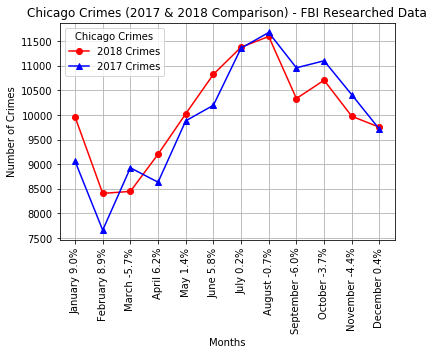

In [15]:
# Generate graph comparing years 

x_axis = np.arange(len(x_month_2018))
Crimes_2018 = plt.plot(x_axis, y_values_2018, label = "2018 Crimes", marker="o", color="red")
Crimes_2017 = plt.plot(x_axis, y_values_2017, label = "2017 Crimes", marker="^", color="blue")
plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_months, rotation='vertical')
plt.legend(title='Chicago Crimes', fontsize = 10)
plt.title("Chicago Crimes (2017 & 2018 Comparison) - FBI Researched Data")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

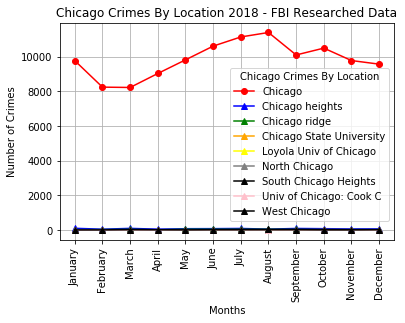

In [16]:
# Generate crime locations
Loc_df = chicago_df[["agency_name","year","month","date", "actual_all_crimes"]]
Loc_2018 = Loc_df[["agency_name","month", "date","actual_all_crimes"]]
Loc_2017 = Loc_df[["agency_name","month", "date","actual_all_crimes"]]

Loc_2018 =  Loc_2018[month_df['year']== 2018]
Loc_2017 =  Loc_2017[month_df['year']== 2017]

Loc_2018_value = Loc_2018.groupby(['agency_name','month', 'date']).sum()
Loc_2017_value = Loc_2017.groupby(['agency_name','month', 'date']).sum()

Loc_sort_2018 = Loc_2018_value.sort_values("date", ascending=True).reset_index()
Loc_sort_2017 = Loc_2017_value.sort_values("date", ascending=True).reset_index()

Location1 = Loc_sort_2018[Loc_sort_2018['agency_name']=='chicago']
Location2 = Loc_sort_2018[Loc_sort_2018['agency_name']=='chicago heights']
Location3 = Loc_sort_2018[Loc_sort_2018['agency_name']=='chicago ridge']
Location4 = Loc_sort_2018[Loc_sort_2018['agency_name']=='chicago state university']
Location5 = Loc_sort_2018[Loc_sort_2018['agency_name']=='loyola univ of chicago']
Location6 = Loc_sort_2018[Loc_sort_2018['agency_name']=='north chicago']
Location7 = Loc_sort_2018[Loc_sort_2018['agency_name']=='south chicago heights']
Location8 = Loc_sort_2018[Loc_sort_2018['agency_name']=='univ of chicago: cook c']
Location9 = Loc_sort_2018[Loc_sort_2018['agency_name']=='west chicago']

Ch1 = Location1['actual_all_crimes']
Ch2 = Location2['actual_all_crimes']
Ch3 = Location3['actual_all_crimes']
Ch4 = Location4['actual_all_crimes']
Ch5 = Location5['actual_all_crimes']
Ch6 = Location6['actual_all_crimes']
Ch7 = Location7['actual_all_crimes']
Ch8 = Location8['actual_all_crimes']
Ch9 = Location9['actual_all_crimes']

month = Location1['month']

Loc_month = month.str.capitalize() 
# Location_month = Loc_sort_2018['month']

x_axis = np.arange(len(Loc_month))
Loc1 = plt.plot(x_axis, Ch1, label = "Chicago", marker="o", color="red")
Loc2 = plt.plot(x_axis, Ch2, label = "Chicago heights", marker="^", color="blue")
Loc3 = plt.plot(x_axis, Ch3, label = "Chicago ridge", marker="^", color="green")
Loc4 = plt.plot(x_axis, Ch4, label = "Chicago State University", marker="^", color="orange")
Loc5 = plt.plot(x_axis, Ch5, label = "Loyola Univ of Chicago", marker="^", color="yellow")
Loc6 = plt.plot(x_axis, Ch6, label = "North Chicago", marker="^", color="gray")
Loc7 = plt.plot(x_axis, Ch7, label = "South Chicago Heights", marker="^", color="black")
Loc8 = plt.plot(x_axis, Ch8, label = "Univ of Chicago: Cook C", marker="^", color="pink")
Loc9 = plt.plot(x_axis, Ch9, label = "West Chicago", marker="^", color="black")

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Loc_month, rotation='vertical')
plt.legend(title='Chicago Crimes By Location', fontsize = 10, bbox_to_anchor=(0.5, 0., 0.5, 0.88))
plt.title("Chicago Crimes By Location 2018 - FBI Researched Data")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

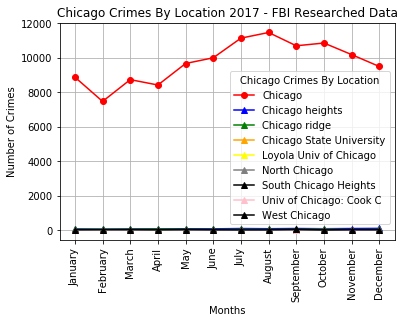

In [58]:
# Generate crimes by location
Location1 = Loc_sort_2017[Loc_sort_2017['agency_name']=='chicago']
Location2 = Loc_sort_2017[Loc_sort_2017['agency_name']=='chicago heights']
Location3 = Loc_sort_2017[Loc_sort_2017['agency_name']=='chicago ridge']
Location4 = Loc_sort_2017[Loc_sort_2017['agency_name']=='chicago state university']
Location5 = Loc_sort_2017[Loc_sort_2017['agency_name']=='loyola univ of chicago']
Location6 = Loc_sort_2017[Loc_sort_2017['agency_name']=='north chicago']
Location7 = Loc_sort_2017[Loc_sort_2017['agency_name']=='south chicago heights']
Location8 = Loc_sort_2017[Loc_sort_2017['agency_name']=='univ of chicago: cook c']
Location9 = Loc_sort_2017[Loc_sort_2017['agency_name']=='west chicago']

Ch1 = Location1['actual_all_crimes']
Ch2 = Location2['actual_all_crimes']
Ch3 = Location3['actual_all_crimes']
Ch4 = Location4['actual_all_crimes']
Ch5 = Location5['actual_all_crimes']
Ch6 = Location6['actual_all_crimes']
Ch7 = Location7['actual_all_crimes']
Ch8 = Location8['actual_all_crimes']
Ch9 = Location9['actual_all_crimes']

month = Location1['month']

Loc_month = month.str.capitalize() 
Loc_month
# Location_month = Loc_sort_2018['month']

x_axis = np.arange(len(Loc_month))
Loc1 = plt.plot(x_axis, Ch1, label = "Chicago", marker="o", color="red")
Loc2 = plt.plot(x_axis, Ch2, label = "Chicago heights", marker="^", color="blue")
Loc3 = plt.plot(x_axis, Ch3, label = "Chicago ridge", marker="^", color="green")
Loc4 = plt.plot(x_axis, Ch4, label = "Chicago State University", marker="^", color="orange")
Loc5 = plt.plot(x_axis, Ch5, label = "Loyola Univ of Chicago", marker="^", color="yellow")
Loc6 = plt.plot(x_axis, Ch6, label = "North Chicago", marker="^", color="gray")
Loc7 = plt.plot(x_axis, Ch7, label = "South Chicago Heights", marker="^", color="black")
Loc8 = plt.plot(x_axis, Ch8, label = "Univ of Chicago: Cook C", marker="^", color="pink")
Loc9 = plt.plot(x_axis, Ch9, label = "West Chicago", marker="^", color="black")

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Loc_month, rotation='vertical')
plt.legend(title='Chicago Crimes By Location', fontsize = 10, bbox_to_anchor=(0.5, 0., 0.5, 0.85))
plt.title("Chicago Crimes By Location 2017 - FBI Researched Data")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

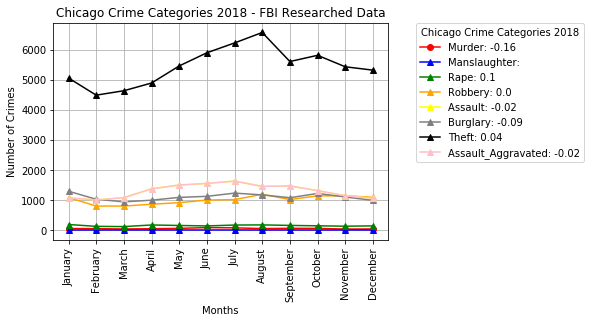

In [17]:
# Generate types of crimes 

Actual_crimes = chicago_df[["year","month","date","actual_murder","actual_manslaughter","actual_rape_total","actual_robbery_total","actual_assault_total","actual_burg_total","actual_theft_total","actual_mtr_veh_theft_total","actual_all_crimes","actual_assault_aggravated"]]

DActual_crimes_Chicago = Actual_crimes.groupby(['year', 'month', 'date']).sum()

Details_sort_2018 = DActual_crimes_Chicago.sort_values("date", ascending=True).reset_index()
# Df_sort_2017 = Df_2017_value.sort_values("date", ascending=True).reset_index()
Crimes_Details_2018 = Details_sort_2018[Details_sort_2018['year']== 2018]
Crimes_Details_2017 = Details_sort_2018[Details_sort_2018['year']== 2017]

month = Crimes_Details_2018['month']

Details_month =  month.str.capitalize()


Analysis_table = pd.merge(Crimes_Details_2018, Crimes_Details_2017, how='left', left_on="month", right_on="month" )

df_drop = Analysis_table.drop(columns=['month', 'date_x', 'date_y', 'year_y'])

grp_crimes = df_drop.groupby(['year_x']).sum()
Index_reset =grp_crimes.sort_values("year_x", ascending=True).reset_index()

Compare_Crimes = Index_reset.drop(columns=['year_x'])


Murder = Crimes_Details_2018['actual_murder']
Manslaughter = Crimes_Details_2018['actual_manslaughter']
Rape = Crimes_Details_2018['actual_rape_total']
Robbery = Crimes_Details_2018['actual_robbery_total']
Assault = Crimes_Details_2018['actual_assault_total']
Burglary = Crimes_Details_2018['actual_burg_total']
Theft = Crimes_Details_2018['actual_theft_total']
Assault_Aggravated = Crimes_Details_2018['actual_assault_aggravated']

M = ((Compare_Crimes['actual_murder_x'] - Compare_Crimes['actual_murder_y'])/Compare_Crimes['actual_murder_x']).round(2)
M = sum(M) 
MA =((Compare_Crimes['actual_manslaughter_x'] - Compare_Crimes['actual_manslaughter_y'])/Compare_Crimes['actual_manslaughter_x']).round(2)
MA = sum(MA) 
R = ((Compare_Crimes['actual_rape_total_x'] - Compare_Crimes['actual_rape_total_y'])/Compare_Crimes['actual_rape_total_x']).round(2)
R = sum(R) 
Ro =((Compare_Crimes['actual_robbery_total_x'] - Compare_Crimes['actual_robbery_total_y'])/Compare_Crimes['actual_robbery_total_x']).round(2)
Ro = sum(Ro) 
As = ((Compare_Crimes['actual_assault_total_x'] - Compare_Crimes['actual_assault_total_y'])/Compare_Crimes['actual_burg_total_x']).round(2)
As = sum(As) 
Bu= ((Compare_Crimes['actual_burg_total_x'] - Compare_Crimes['actual_burg_total_y'])/Compare_Crimes['actual_burg_total_x']).round(2)
Bu = sum(Bu) 
Th = ((Compare_Crimes['actual_theft_total_x'] - Compare_Crimes['actual_theft_total_y'])/Compare_Crimes['actual_theft_total_x']).round(2)
Th = sum(Th) 
AA = ((Compare_Crimes['actual_assault_aggravated_x'] - Compare_Crimes['actual_assault_aggravated_y'])/Compare_Crimes['actual_assault_aggravated_x']).round(2)
AA = sum(AA) 
MA

x_axis = np.arange(len(Details_month))
Loc1 = plt.plot(x_axis, Murder, label = 'Murder: '+ str(M), marker="o", color="red")
Loc2 = plt.plot(x_axis, Manslaughter, label ='Manslaughter: ' , marker="^", color="blue")
Loc3 = plt.plot(x_axis, Rape, label = 'Rape: ' + str(R), marker="^", color="green")
Loc4 = plt.plot(x_axis, Robbery, label = 'Robbery: ' + str(Ro), marker="^", color="orange")
Loc5 = plt.plot(x_axis, Assault, label = 'Assault: '+ str(As), marker="^", color="yellow")
Loc6 = plt.plot(x_axis, Burglary, label = 'Burglary: ' + str(Bu), marker="^", color="gray")
Loc7 = plt.plot(x_axis, Theft, label = 'Theft: ' + str(Th), marker="^", color="black")
Loc8 = plt.plot(x_axis, Assault_Aggravated, label = 'Assault_Aggravated: ' + str(AA), marker="^", color="pink")

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Loc_month, rotation='vertical')
plt.legend(title='Chicago Crime Categories 2018', fontsize = 10, bbox_to_anchor=(0.5, -0.78, 1.1, 1.8))
plt.title("Chicago Crime Categories 2018 - FBI Researched Data")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")



Text(0, 0.5, 'Number of Crimes')

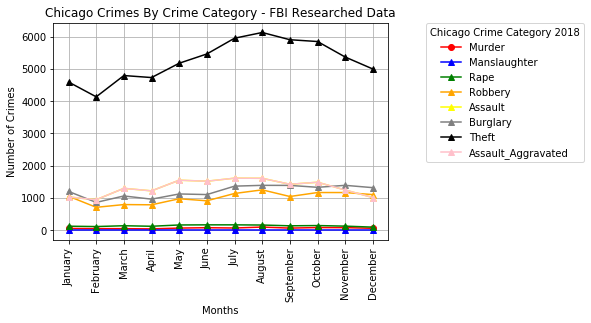

In [63]:
# Generate types of crime

month = Crimes_Details_2017['month']

Details_month = month.str.capitalize() 

Murder = Crimes_Details_2017['actual_murder']
Manslaughter = Crimes_Details_2017['actual_manslaughter']
Rape = Crimes_Details_2017['actual_rape_total']
Robbery = Crimes_Details_2017['actual_robbery_total']
Assault = Crimes_Details_2017['actual_assault_total']
Burglary = Crimes_Details_2017['actual_burg_total']
Theft = Crimes_Details_2017['actual_theft_total']
Assault_Aggravated = Crimes_Details_2017['actual_assault_aggravated']


x_axis = np.arange(len(Details_month))
Loc1 = plt.plot(x_axis, Murder, label = "Murder", marker="o", color="red")
Loc2 = plt.plot(x_axis, Manslaughter, label = "Manslaughter", marker="^", color="blue")
Loc3 = plt.plot(x_axis, Rape, label = "Rape", marker="^", color="green")
Loc4 = plt.plot(x_axis, Robbery, label = "Robbery", marker="^", color="orange")
Loc5 = plt.plot(x_axis, Assault, label = "Assault", marker="^", color="yellow")
Loc6 = plt.plot(x_axis, Burglary, label = "Burglary", marker="^", color="gray")
Loc7 = plt.plot(x_axis, Theft, label = "Theft", marker="^", color="black")
Loc8 = plt.plot(x_axis, Assault_Aggravated, label = "Assault_Aggravated", marker="^", color="pink")

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Loc_month, rotation='vertical')
plt.legend(title='Chicago Crime Categories 2017', fontsize = 10, bbox_to_anchor=(0.5, -0.78, 1.1, 1.8))
plt.title("Chicago Crime Categories - FBI Researched Data")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

No handles with labels found to put in legend.


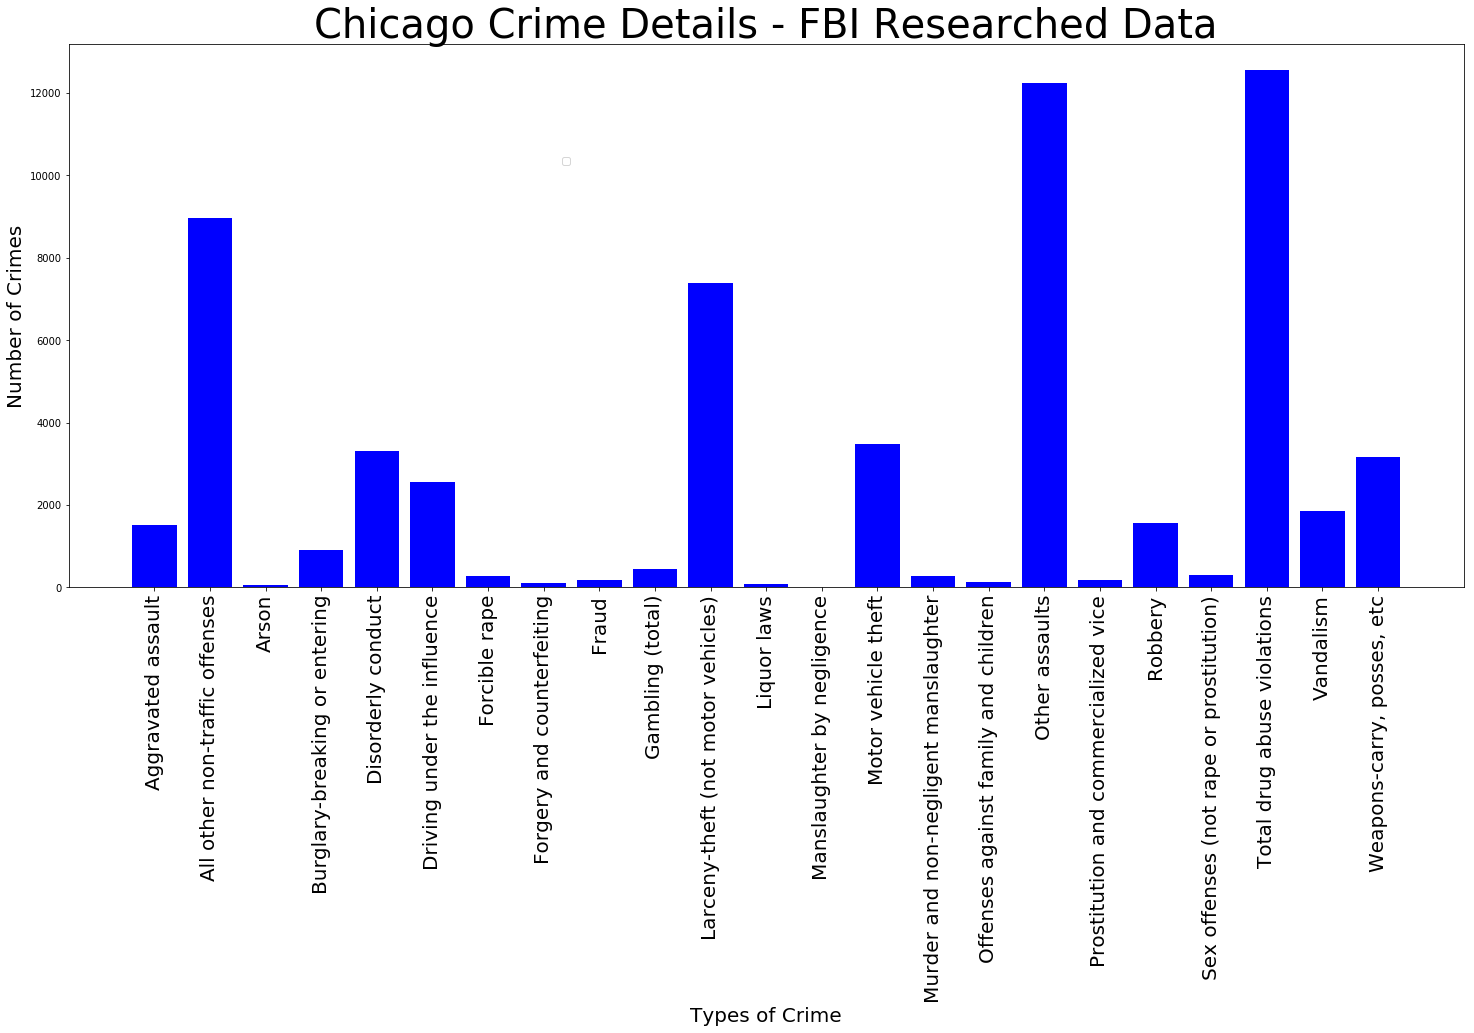

In [20]:
# Generate crimes details
df_gender = gender_df[["OFFENSE", "TOTAL"]] 
df_gender_1 = df_gender.groupby('OFFENSE').sum().reset_index()
df_gender_off = df_gender_1['OFFENSE'] 
df_gender_tot = df_gender_1['TOTAL']

x_axis = np.arange(len(df_gender_off))
plt.bar(x_axis, df_gender_tot, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, df_gender_off, rotation='vertical', fontsize=20)
plt.legend(fontsize = 10, loc='best', bbox_to_anchor=(0.35, 0., 0.5, 0.8))
plt.title("Chicago Crime Details - FBI Researched Data", Fontsize = 40)
plt.xlabel("Types of Crime", fontsize =20)
plt.ylabel("Number of Crimes", fontsize = 20)
plt.rcParams['figure.figsize'] = (25,10)

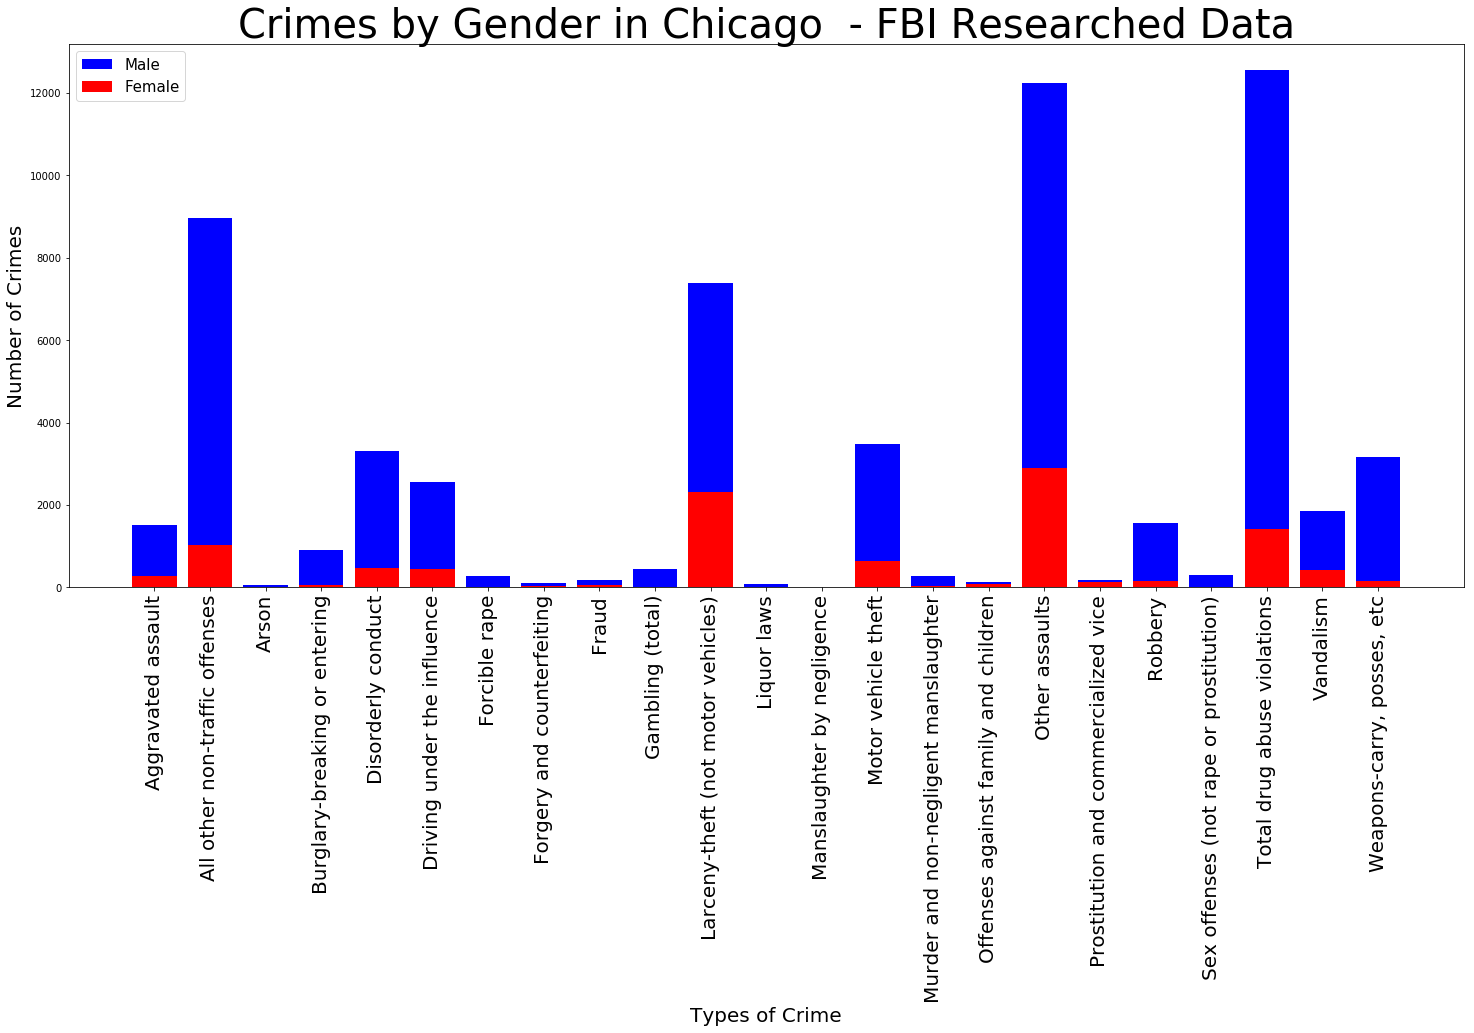

In [33]:
# Generate crimes by gender
df_gender_total = gender_df[["OFFENSE", "MALE_TOTAL", "FEMALE_TOTAL"]] 
df_gender_TOT1 = df_gender_total.groupby('OFFENSE').sum().reset_index()

df_gender_off = df_gender_TOT1['OFFENSE'] 
df_gender_tot_male = df_gender_TOT1['MALE_TOTAL']
df_gender_tot_Female = df_gender_TOT1['FEMALE_TOTAL']

x_axis = np.arange(len(df_gender_off))
plt.bar(x_axis, df_gender_tot_male, label = "Male", color="b", align="center")
plt.bar(x_axis, df_gender_tot_Female, label = "Female", color="R", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, df_gender_off, rotation='vertical', fontsize=20)
plt.legend(fontsize = 15, loc='best', bbox_to_anchor=(0.0, 0.7, 0.9, 0.3))
plt.title("Crimes by Gender in Chicago  - FBI Researched Data", Fontsize = 40)
plt.xlabel("Types of Crime", fontsize =20)
plt.ylabel("Number of Crimes", fontsize = 20)
plt.rcParams['figure.figsize'] = (25,10)


In [24]:
Gender_crimes = gender_df[["Gender ","10_14years ","15-19years ","20-24years ","MALE25_29","MALE30_34","MALE35_39","MALE40_44","MALE45_49","MALE50_54","MALE55_59","MALE60_64","MALE65"]]
df_gender_all = Gender_crimes.groupby('Gender ').sum().reset_index()
df_gender_all

,Gender,10_14years,15-19years,20-24years,MALE25_29,MALE30_34,MALE35_39,MALE40_44,MALE45_49,MALE50_54,MALE55_59,MALE60_64,MALE65
0,Female,359,2358,1948,1623,1096,791,662,707,536,317,150,56
1,Male,1469,10370,9930,7663,5503,3939,3057,3090,2648,1928,890,415


In [25]:
df_gender_all.columns = ['Gender','Ages:10-14','Ages:15-19','Ages:20-24','Ages:25-29','Ages:30-34','Ages:35-39','Ages:40-44','Ages:45-49','Ages:50-54','Ages:55-59','Ages:60-64','Ages:65>']
df_gender_all

,Gender,Ages:10-14,Ages:15-19,Ages:20-24,Ages:25-29,Ages:30-34,Ages:35-39,Ages:40-44,Ages:45-49,Ages:50-54,Ages:55-59,Ages:60-64,Ages:65>
0,Female,359,2358,1948,1623,1096,791,662,707,536,317,150,56
1,Male,1469,10370,9930,7663,5503,3939,3057,3090,2648,1928,890,415


In [26]:
df1_transposed = df_gender_all.T
row = df1_transposed.reset_index() 
row.columns = ['Age','Female', 'Male']
row.applymap(np.isreal)
df=row.drop(0)
df.reset_index() 

,index,Age,Female,Male
0,1,Ages:10-14,359,1469
1,2,Ages:15-19,2358,10370
2,3,Ages:20-24,1948,9930
3,4,Ages:25-29,1623,7663
4,5,Ages:30-34,1096,5503
5,6,Ages:35-39,791,3939
6,7,Ages:40-44,662,3057
7,8,Ages:45-49,707,3090
8,9,Ages:50-54,536,2648
9,10,Ages:55-59,317,1928


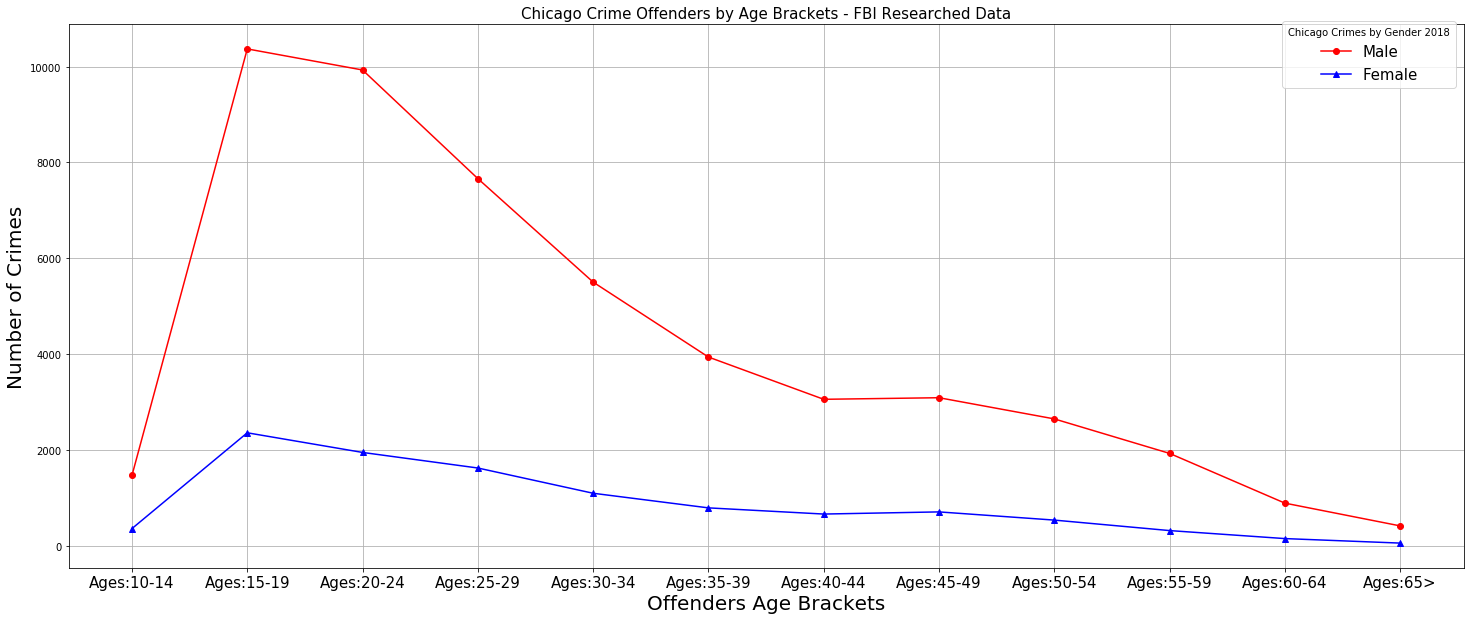

In [32]:
# Generate Chicago crime by age
df_gender_off = df['Age'] 
tot_male = df['Male']
tot_Female = df['Female']

x_axis = np.arange(len(df_gender_off))
Loc1 = plt.plot(x_axis, tot_male, label = "Male", marker="o", color="red")
Loc2 = plt.plot(x_axis, tot_Female , label = "Female", marker="^", color="blue")
plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, df_gender_off , rotation='horizontal', fontsize=15)
plt.legend(title='Chicago Crimes by Gender 2018', fontsize = 15, bbox_to_anchor=(-0.1, -0.78, 1.1, 1.8))
plt.title("Chicago Crime Offenders by Age Brackets - FBI Researched Data", Fontsize = 15)
plt.xlabel("Offenders Age Brackets", Fontsize = 20)
plt.ylabel("Number of Crimes", Fontsize = 20)
plt.rcParams['figure.figsize'] = (25,10)
